# BMDC 1D Analysis

In [1]:
import scanpy as sc
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import itertools
from pybedtools import BedTool
import pickle as pkl
%matplotlib inline

In [2]:
pd.set_option('max_columns', None)

In [3]:
import sys
sys.path.append('/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.6-py3.8.egg')
sys.path.append('/home/ssm-user/Github/misc-seq/miscseq/')
import encode
import memento

In [4]:
data_path = '/data_volume/memento/bmdc/'

### Read the guide labled perturb-seq data

From perturbseq paper

In [5]:
adata = sc.read(data_path + 'h5ad/filtered-bmdc.h5ad')

In [6]:
guides = []
for s in adata.obs.guide_string:
    guides += s.split('-')
guides = list(set(guides))

In [7]:
# guides = adata.obs.guides.drop_duplicates().tolist()
# guides = [g for g in guides if ('INTER' not in g and 'nan' not in g)]
# ko_genes = adata.obs.query('KO == 1')['KO_GENE'].drop_duplicates().tolist()

### Setup memento

In [8]:
adata.obs['q'] = 0.07

In [9]:
memento.setup_memento(adata, q_column='q', filter_mean_thresh=0.07)

Version 0.0.6


/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.6-py3.8.egg/memento/main.py:70: RankWarning: Polyfit may be poorly conditioned


### Memento

In [11]:
adata.obs.head(5)

,guide,guide_string,tp,batch,WT,KO,n_counts,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,q,memento_size_factor
cell,,,,,,,,,,,,,,,
AAACATACACCAAC_dc0h_G9-0,['m_Stat3_3'],m_Stat3_3,0hr,0,False,1,834.0,429,429,834.0,3.0,0.359712,0,0.07,0.601173
AAACATACACCCTC_dc0h_H9-0,"['m_Stat2_2', 'm_Nfkb1_2']",m_Stat2_2-m_Nfkb1_2,0hr,0,False,1,4584.0,1798,1798,4584.0,47.0,1.025305,0,0.07,0.992489
AAACATACAGGGTG_dc0h_G9-0,['m_Irf1_1'],m_Irf1_1,0hr,0,False,1,1045.0,481,481,1045.0,7.0,0.669856,0,0.07,0.576144
AAACATACATCAGC_dc0h_H8-0,"['m_Nfkb1_3', 'm_Nfkb1_2']",m_Nfkb1_3-m_Nfkb1_2,0hr,0,False,1,2277.0,1125,1125,2277.0,15.0,0.658762,0,0.07,0.757603
AAACATACCCATGA_dc0h_G9-0,['m_Nfkb1_4'],m_Nfkb1_4,0hr,0,False,1,2249.0,1108,1108,2249.0,10.0,0.444642,0,0.07,0.767229


In [16]:
adata.obs.WT.value_counts()

False    47171
True      1134
Name: WT, dtype: int64

In [18]:
subset.shape

(675, 0)

In [ ]:
adata

In [21]:
subset.X.mean(axis=0).max()

243.43994

In [40]:
subset.obs.leiden.value_counts()

0    5625
2     275
1      30
Name: leiden, dtype: int64

In [61]:
adata

AnnData object with n_obs × n_vars = 48305 × 16564
    obs: 'guide', 'guide_string', 'tp', 'batch', 'WT', 'KO', 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'q', 'memento_size_factor'
    var: 'gene_id-0', 'gene_id-1'
    uns: 'memento'

In [62]:
for g in guides:
    
    print(g)
    g= 'Stat1'
    
    subset = adata[
        adata.obs.tp.isin(['0hr'])
        ].copy().copy()
    
    subset.obs['is_ko'] = subset.obs.guide_string.str.contains(g).values
    
    memento.create_groups(subset, label_columns=['is_ko', 'leiden'])
    
    memento.compute_1d_moments(subset, min_perc_group=.5)
    
    memento.ht_1d_moments(
        subset, 
        formula_like='1 + is_ko + leiden',
        treatment_col='is_ko', 
        num_boot=5000, 
        verbose=1,
        resampling='permutation',
        approx=True,
        num_cpus=14)
    
    break
    
#     subset.write(data_path + '2d_self_h5ad/{}.h5ad'.format(g))

m_Ahr_3


/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.7s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:    5.0s
[Parallel(n_jobs=14)]: Done 422 tasks      | elapsed:   11.6s
[Parallel(n_jobs=14)]: Done 772 tasks      | elapsed:   22.1s
[Parallel(n_jobs=14)]: Done 1222 tasks      | elapsed:   36.2s
[Parallel(n_jobs=14)]: Done 1772 tasks      | elapsed:   52.8s
[Parallel(n_jobs=14)]: Done 2422 tasks      | elapsed:  1.2min
[Parallel(n_jobs=14)]: Done 3172 tasks      | elapsed:  1.6min
[Parallel(n_jobs=14)]: Done 4022 tasks      | elapsed:  2.0min
[Parallel(n_jobs=14)]: Done 4441 out of 4441 | elapsed:  2.4min finished


In [63]:
subset

AnnData object with n_obs × n_vars = 24217 × 4441
    obs: 'guide', 'guide_string', 'tp', 'batch', 'WT', 'KO', 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'q', 'memento_size_factor', 'is_ko', 'memento_group'
    var: 'gene_id-0', 'gene_id-1'
    uns: 'memento'

In [64]:
df = memento.get_1d_ht_result(subset)

In [65]:
df['de_fdr'] = memento.util._fdrcorrect(df['de_pval'])
df['dv_fdr'] = memento.util._fdrcorrect(df['dv_pval'])

In [66]:
df.query('de_fdr < 0.1')

,gene,de_coef,de_se,de_pval,dv_coef,dv_se,dv_pval,de_fdr,dv_fdr


/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='de_coef', ylabel='Density'>

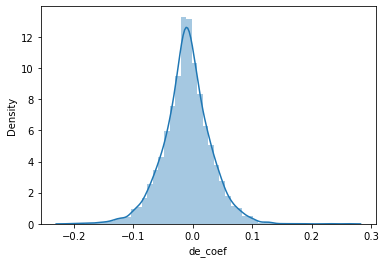

In [70]:
sns.distplot(df['de_coef'])

In [71]:
df['dv_pval'].min()

0.00027310807688639584

In [79]:
filtered_df = df.query('dv_coef > 0.6 | dv_coef < -0.6').copy()
filtered_df['de_fdr'] = memento.util._fdrcorrect(filtered_df['de_pval'])
filtered_df['dv_fdr'] = memento.util._fdrcorrect(filtered_df['dv_pval'])

In [80]:
filtered_df.sort_values('de_fdr')

,gene,de_coef,de_se,de_pval,dv_coef,dv_se,dv_pval,de_fdr,dv_fdr
2590,Appl1,-0.189303,0.062989,0.002653,-1.045370,0.893075,0.241789,0.570382,0.267774
2637,Ngdn,0.066474,0.038300,0.082629,-0.619962,0.197640,0.001708,0.683281,0.082191
1008,Zdhhc21,0.098259,0.052358,0.060562,0.642448,0.372952,0.084961,0.683281,0.161127
3867,Gm5483,-0.191321,0.097545,0.049838,-1.226904,0.870802,0.158854,0.683281,0.201676
3749,Twf1,-0.067900,0.039066,0.082196,0.784043,0.227191,0.000558,0.683281,0.082191
...,...,...,...,...,...,...,...,...,...
3738,Atxn10,-0.001235,0.042985,0.977087,0.636208,0.307657,0.038648,0.984020,0.147004
2713,4931406C07Rik,-0.001389,0.053892,0.979443,0.796920,0.569918,0.162021,0.984020,0.202527
2904,Ndufaf3,0.002372,0.044915,0.957888,0.718853,0.393524,0.067744,0.984020,0.150387
261,Phyh,0.002676,0.060083,0.964480,0.724015,0.511069,0.156580,0.984020,0.201586


In [72]:
df.sort_values('dv_pval')

,gene,de_coef,de_se,de_pval,dv_coef,dv_se,dv_pval,de_fdr,dv_fdr
3617,Dab2,-0.009180,0.030172,0.760938,-0.560985,0.154136,0.000273,0.982760,0.797630
3749,Twf1,-0.067900,0.039066,0.082196,0.784043,0.227191,0.000558,0.862292,0.797630
3618,Fyb,0.003404,0.032799,0.917338,0.430096,0.132779,0.001199,0.988550,0.797630
803,Ubap2l,0.032034,0.027460,0.243391,0.798079,0.248173,0.001301,0.907900,0.797630
820,S100a11,0.016178,0.012787,0.205789,0.135432,0.042790,0.001551,0.907900,0.797630
...,...,...,...,...,...,...,...,...,...
3528,Arf6,-0.033421,0.026366,0.204944,0.000226,0.147194,0.998776,0.907900,0.999479
2287,Tmbim4,0.013307,0.026034,0.609262,0.000183,0.141843,0.998969,0.966870,0.999479
370,Gca,0.150333,0.149174,0.313564,-0.000617,0.517727,0.999049,0.911683,0.999479
87,Wdfy1,-0.145767,0.048090,0.002436,-0.000196,0.209772,0.999254,0.654695,0.999479


(array([511., 503., 498., 436., 449., 420., 400., 459., 361., 404.]),
 array([2.73108077e-04, 1.00213367e-01, 2.00153626e-01, 3.00093885e-01,
        4.00034145e-01, 4.99974404e-01, 5.99914663e-01, 6.99854922e-01,
        7.99795181e-01, 8.99735440e-01, 9.99675699e-01]),
 <BarContainer object of 10 artists>)

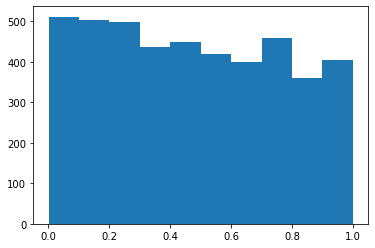

In [69]:
plt.hist(df['dv_pval'])